In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from datasets import train_test_random_split, load_dsprites, CustomDSpritesDataset
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae, compute_mig
from beta_vae import Classifier
from factor_vae import Discriminator
from train import test_beta_vae, test_factor_vae, test_control_vae

In [2]:
seed = 2

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cpu'

In [16]:
def plot_loss(loss_lists, title):
    if not isinstance(loss_lists[0], list):
        loss_lists = [loss_lists]
    for loss_list in loss_lists:
        plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training "+title+" of the classifier over epochs")
    plt.show()

In [4]:
dataset = load_dsprites("../../datasets/dsprites.npz",False)

In [5]:
data_ = CustomDSpritesDataset(dataset,seed=seed)

In [6]:
transform = None
transform_needs_latents = False

# transform = AddUniformNoise(-.1, .1)
# transform_needs_latents = False

# transform = AddGeneratedNoise(abs_path + "/datasets/noisenet.pth", device)
# transform_needs_latents = True

In [7]:
data_train, data_test = train_test_random_split(data_.idx,0.8, seed=seed)

In [8]:
batch_size=64
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False)

In [14]:
folder = "normal_dataset_bernoulli_fc_models"

In [15]:
model_names = [f for f in os.listdir('../trained_models/'+folder) if f[-4:] =='.dat' ]
model_names

['betavae_beta4_e50_n.dat',
 'factorvae_epochs50_gamma5_lrvae0.01_lrd0.0001.dat',
 'factorvae_epochs50_gamma20_lrvae0.01_lrd8e-05.dat',
 'factorvae_epochs50_gamma40_lrvae0.01_lrd5e-05.dat',
 'betavae_beta1_e50_n.dat']

In [20]:

recon_losses = []
betavae_metric_accuracies=[]
factorvae_metric_accuracies=[]
mig_scores = []


model 1: controlvae_epoch50_lr1e2_Cmax10_noisy.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Reconstruction loss: 65.0611535873678
accuracies : [0.5680000000000001, 0.554, 0.5700000000000001, 0.542, 0.5700000000000001]
[[[ 0.   3.8  0.   4.   2.6  2.4]
  [ 0.  60.2 93.8  6.8  0.   0. ]
  [ 0.  17.6  0.  22.   6.   0.4]
  [ 0.   2.2  0.  11.8  2.4 12. ]
  [ 0.   2.   0.  13.6  0.8  4.4]
  [ 0.   4.6  0.   6.  11.8 18.4]
  [ 0.   0.4  0.   4.2  7.8  0. ]
  [ 0.   3.   0.  11.4 18.4 42.2]
  [ 0.  11.   0.  14.2  0.   0.6]
  [ 0.   1.   0.   5.  48.6 22.6]]]
0.5608
Factor Vae metric: 
Accuracy: 0.5608000000000001
Beta Vae metric: 
Accuracy: 0.6080000000000001


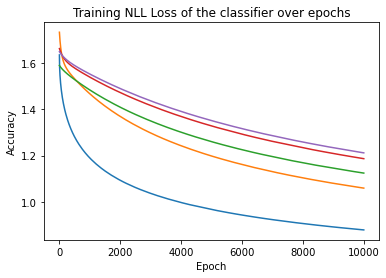

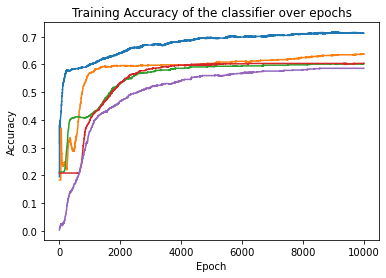

Mig metric
Scores: [0.09207562276502321, 0.09112422142593679, 0.09078962321763527, 0.09116815067004028, 0.09084425043144406]
Score: 0.09120037370201592
model 2: controlvae_epoch50_lr1e2_Cmax8_noisy.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 66.92929163078468
accuracies : [0.5760000000000001, 0.552, 0.556, 0.542, 0.5680000000000001]
[[[ 0.   4.6  0.   3.6  1.4  2.6]
  [ 0.  61.8 93.8  6.8  0.   0. ]
  [ 0.  17.8  0.  21.   4.   0.4]
  [ 0.   1.8  0.  11.8  2.6 12.6]
  [ 0.   2.6  0.  17.4  1.6  5. ]
  [ 0.   4.4  0.   5.8 12.8 18. ]
  [ 0.   0.4  0.   4.   8.6  0. ]
  [ 0.   3.   0.  11.  20.6 41.2]
  [ 0.   8.2  0.  12.4  0.   0.8]
  [ 0.   1.2  0.   5.2 46.8 22.4]]]
0.5588
Factor Vae metric: 
Accuracy: 0.5588
Beta Vae metric: 
Accuracy: 0.6080000000000001


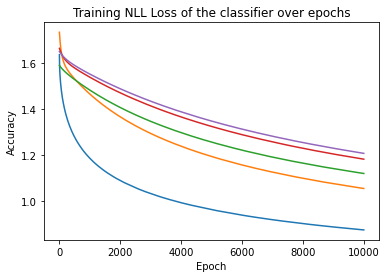

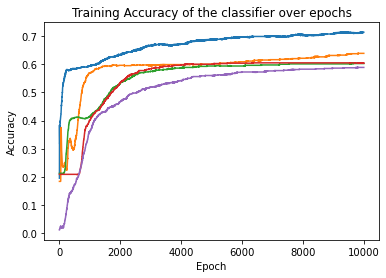

Mig metric
Scores: [0.09132084088647241, 0.08953365386084418, 0.08976471065182165, 0.08975849240175436, 0.090017235610952]
Score: 0.09007898668236891
model 3: betavae_beta4_e50_noise.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 216.74781609243817
accuracies : [0.8140000000000001, 0.808, 0.8280000000000001, 0.794, 0.812]
[[[  0.    0.4   0.    4.6   0.    1.6]
  [  0.    0.    0.    1.8   0.    0. ]
  [  0.    0.    0.    2.6   0.    0. ]
  [  0.   25.   93.8   2.4   0.    0. ]
  [  0.    4.4   0.   23.8   0.    0. ]
  [  0.   70.6   0.   46.    0.    0. ]
  [  0.    0.8   0.    2.6   0.    0.2]
  [  0.    0.6   0.    3.4   0.  101.2]
  [  0.    2.4   0.    6.2   0.    0. ]
  [  0.    1.6   0.    5.6  98.4   0. ]]]
0.8112
Factor Vae metric: 
Accuracy: 0.8112
Beta Vae metric: 
Accuracy: 0.796


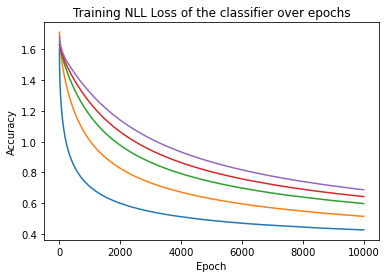

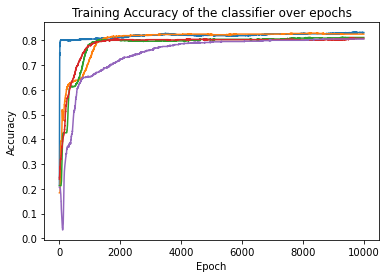

Mig metric
Scores: [0.2124688613336588, 0.2126591244696237, 0.21087171259872334, 0.2106753891808631, 0.21099452987753214]
Score: 0.2115339234920802
model 4: noisy_factorvae_epochs50_gamma5_lrvae0.01_lrd0.0001.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 192.61311558882394
accuracies : [0.75, 0.724, 0.726, 0.716, 0.746]
[[[  0.    0.6   2.4   8.2   0.    0. ]
  [  0.    0.    1.2   4.6   0.    0. ]
  [  0.   58.    2.2  37.6   0.    0. ]
  [  0.    0.2   2.4   8.6   0.    0. ]
  [  0.    0.6   5.8  13.4   0.    0. ]
  [  0.    2.   20.    5.    0.    0. ]
  [  0.    7.4   6.4   4.6  95.2   0. ]
  [  0.   16.   51.4   7.2   0.    0. ]
  [  0.   20.6   0.8   6.2   3.2 103. ]
  [  0.    0.4   1.2   3.6   0.    0. ]]]
0.7323999999999999
Factor Vae metric: 
Accuracy: 0.7324
Beta Vae metric: 
Accuracy: 0.6990000000000001


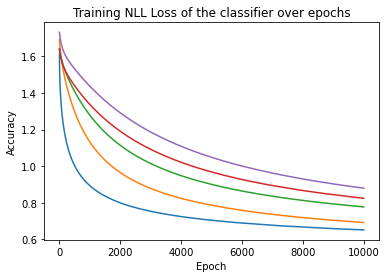

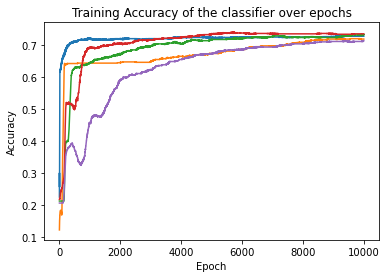

Mig metric
Scores: [0.14708848142565878, 0.1466328810442929, 0.14720373847405235, 0.14788477987840581, 0.1473065889195817]
Score: 0.1472232939483983
model 5: controlvae_epoch50_lr1e2_Cmax12_noisy.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 61.635296354691185
accuracies : [0.5640000000000001, 0.526, 0.552, 0.552, 0.558]
[[[ 0.   2.8  0.   9.2  6.4 14.6]
  [ 0.  67.  93.8  6.8  0.   0. ]
  [ 0.   9.6  0.  15.2  0.8  2.8]
  [ 0.   7.8  0.  13.8  1.8  8.4]
  [ 0.   1.   0.   5.8  0.   1.2]
  [ 0.   5.4  0.  11.4  6.2  0. ]
  [ 0.   8.4  0.   9.   9.2  0. ]
  [ 0.   0.4  0.   7.8 15.  37.8]
  [ 0.   3.   0.  11.2  0.   2. ]
  [ 0.   0.4  0.   8.8 59.  36.2]]]
0.5504
Factor Vae metric: 
Accuracy: 0.5504
Beta Vae metric: 
Accuracy: 0.609


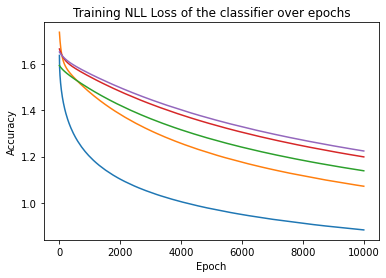

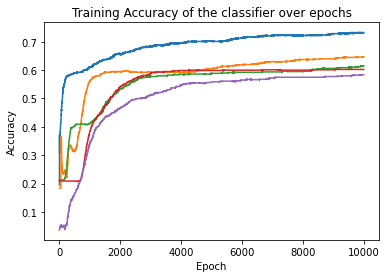

Mig metric
Scores: [0.09341049189991832, 0.09309833657222619, 0.09209793329462576, 0.09291947926071684, 0.09291050209893535]
Score: 0.0928873486252845


In [21]:
i=1

for name in model_names:
    model = torch.load('../trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    if "betavae" in name:
        recon_loss = test_beta_vae(model, test_loader,0, 'bernoulli', transform, transform_needs_latents, device=device)
    elif "controlvae" in name:
        recon_loss = test_control_vae(model, test_loader, 'bernoulli',transform, transform_needs_latents, device=device)
    elif "factorvae" in name:
        discriminator = Discriminator()
        recon_loss = test_factor_vae(model,discriminator, test_loader,0, 'bernoulli',transform, transform_needs_latents, device=device)
    else:
        print("Error in the dataset name")
        break
    recon_losses.append(recon_loss)
    print("Reconstruction loss: "+str(recon_loss))
    accuracies = entanglement_metric_factor_vae(model, data_, 500, 200, random_seeds=5, device = device,seed=seed)
    factorvae_metric_accuracies.append(accuracies)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(np.mean(accuracies)))
    print("Beta Vae metric: ")
    torch.manual_seed(seed)
    classifier = Classifier()
    classifier.to(device)
    optimizer = torch.optim.Adagrad(classifier.parameters(), lr=1e-2)
    train_losses, train_accuracies, test_accuracies = entanglement_metric_beta_vae(model, classifier, optimizer, 10000,  data_, 1000, 50, random_seeds=5, device = device,seed=seed)
    betavae_metric_accuracies.append(test_accuracies)
    print("Accuracy: "+str(np.mean(test_accuracies)))
    plot_loss(train_losses, "NLL Loss")
    plot_loss(train_accuracies, "Accuracy")
    print("Mig metric")
    scores = compute_mig(model, data_, num_samples=100000, random_seeds=5, device=device, seed=seed)
    mig_scores.append(scores)
    print("Scores: "+str(scores))
    print("Score: "+str(np.mean(scores)))
    i+=1

In [23]:
np.save(folder+"_model_names.npy", np.array(model_names))
np.save(folder+"_test_recon_losses.npy", np.array(recon_losses))
np.save(folder+"_betavaemetric_scores.npy", np.array(betavae_metric_accuracies))
np.save(folder+"_factorvaemetric_scores.npy", np.array(factorvae_metric_accuracies))
np.save(folder+"_mig_scores.npy", np.array(mig_scores))

[[0.805, 0.565, 0.6, 0.51, 0.56],
 [0.8, 0.56, 0.61, 0.51, 0.56],
 [0.87, 0.745, 0.805, 0.785, 0.775],
 [0.77, 0.62, 0.73, 0.69, 0.685],
 [0.8, 0.555, 0.615, 0.515, 0.56]]